In [23]:
import os

PROJECT_ROOT = '/home/student/Repositories/lung-cancer-detection'
PROCESSED_FOLDER = "LIDC-IDRI/CT/processed"
NODULE_FOLDER = "nodule"
NON_NODULE_FOLDER = "non_nodule"

In [24]:
nodules_path = os.path.join(PROJECT_ROOT, PROCESSED_FOLDER, NODULE_FOLDER)
files = os.listdir(nodules_path)
print("Number of files in processed folder: ", len(files))  

Number of files in processed folder:  173


In [36]:
import numpy as np
import plotly.graph_objects as go

fig = go.Figure()

# Add images to the figure
for f in files[:10]:
    img = np.load(os.path.join(nodules_path, f))
    # For a grayscale image, ensure that the array is 2D
    # FIXME: These images aren't visible
    fig.add_trace(
        go.Image(z=img, visible=False)  # Start with all images invisible
    )

# Make the first image visible
fig.data[0].visible = True

# Create steps for the slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)}],  # Make all images invisible
        label=f"Image {i+1}"
    )
    step["args"][0]["visible"][i] = True  # Toggle i-th image to "visible"
    steps.append(step)

# Create the slider
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Image: "},
    steps=steps
)]

# Update layout with the slider and adjust other layout properties
fig.update_layout(
    sliders=sliders,
    xaxis_showgrid=False, yaxis_showgrid=False,
    xaxis_zeroline=False, yaxis_zeroline=False,
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),  # Force x and y to have the same range
    width=600, height=600,
)

# Show figure
fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'colormodel' property of image
        Received value: 'gray'

    The 'colormodel' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['rgb', 'rgba', 'rgba256', 'hsl', 'hsla']

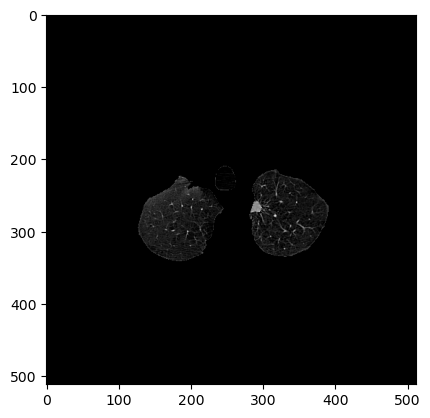

In [29]:
import matplotlib.pyplot as plt

img = np.load(os.path.join(nodules_path, files[0]))  
plt.imshow(img, cmap='gray')

In [31]:
img.shape

(512, 512)

In [32]:
fig = go.Figure()

# Add image trace
fig.add_trace(go.Image(z=img))

# Update layout to match the image's aspect ratio
fig.update_layout(
    xaxis_showgrid=False, yaxis_showgrid=False,
    xaxis_zeroline=False, yaxis_zeroline=False,
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),  # Force x and y to have the same range
    width=600, height=600,
)

fig.show()
